# Foundations of Data Science
## (Mini-)Homework 1

### Description
In this homework you are supposed to get comfortable (or make sure that you are!) with the very basic python tools frequently used in data science. All you have to do in this homework is to load several types of datasets into Pandas, extract simple statistics from it, and simply visualize your insights.

### Name: Kimia Mohsenian
### Student ID: 97110671

In [1]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
DATA_FOLDER = 'data'

## Question 1. Another LEGO brick in the wall
LEGO is a popular brand of toy building bricks. They are often sold in sets in order to build a specific object. Each set contains a number of parts in different shapes, sizes and colors. This database contains information on which parts are included in different LEGO sets. It was originally compiled to help people who owned some LEGO sets already figure out what other sets they could build with the pieces they had.

This dataset contains the official LEGO colors, parts, inventories (i.e., sets of LEGO parts which assembled create an object in the LEGO world) and sets (i.e., sets of LEGO inventories which assembled create a LEGO ecosystem). The schema of the dataset can be shown in the following UML diagram: 

![lego-schema](lego-schema.png)

In this task you have to apply the following Data Wrangling pipeline:
* Load your data into `Pandas`
* Explore it and clean its dirty parts
* Use it to answer a set of queries

Each of these subtasks are described in detail below.

### 1.1. Loading phase
Load all the csv files into different `DataFrames`. Use meaningful names for your `DataFrames` (e.g., the respective filenames).

*Hint: You can load files without first unzipping them (for `Pandas` version >= 0.18.1).*

In [3]:
LegoPath = DATA_FOLDER + "/lego/"
# loading csv files
colors = pd.read_csv(LegoPath+"colors.csv.zip")
inventories = pd.read_csv(LegoPath+"inventories.csv.zip")
inventory_parts = pd.read_csv(LegoPath+"inventory_parts.csv.zip")
inventory_sets = pd.read_csv(LegoPath+"inventory_sets.csv.zip")
parts = pd.read_csv(LegoPath+"parts.csv.zip")
sets = pd.read_csv(LegoPath+"sets.csv.zip")
themes = pd.read_csv(LegoPath+"themes.csv.zip")

### 1.2. Cleaning phase
Explore the following columns from your dataset:

* sets: year
* inventory_parts: quantity

What is the time range of the sets? 
What is the average quantity of the inventory parts? 
Do you see any inconsistencies? 
Provide code that detects and cleans such inconsistencies and validates the coherence of your dataset. 

In [4]:
sets.head(11)

,id,name,year,theme_id,num_parts
0,00-1,Weetabix Castle,70s,414,471
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12
5,0014-1,Space Mini-Figures,1979,143,12
6,0015-1,Space Mini-Figures,1979,143,18
7,0016-1,Castle Mini Figures,19788,186,15
8,00-2,Weetabix Promotional House 1,1976,413,147
9,00-3,Weetabix Promotional House 2,1976,413,149


In [5]:
year = sets['year']
print(year.max())
print(year.min())

80s
-1962


In [6]:
# detecting inconsitent year values and their corresponding indexes
bad_indexes = []
for i in range(len(year)):
    if year[i].isnumeric()==False:
        bad_indexes.append(i)
    else:
        if int(year[i])<0 or int(year[i])>2022:
            bad_indexes.append(i)

In [7]:
print("Number of total columns: ", len(year))
print("Number of inconsistent columns: ", len(bad_indexes))

Number of total columns:  11673
Number of inconsistent columns:  3085


In [8]:
# dropping rows with inconsistencies
modified_sets = sets.drop(bad_indexes)
modified_sets

,id,name,year,theme_id,num_parts
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12
5,0014-1,Space Mini-Figures,1979,143,12
...,...,...,...,...,...
11664,vwkit-1,Volkswagen Kit,1959,366,22
11665,W098-1,"Watch Set, Classic Blue",2006,501,0
11666,W991526-1,Homeschool Introduction to Simple and Motorize...,2009,529,0
11670,Wiesbaden-1,"LEGO Store Grand Opening Exclusive Set, Wiesba...",2010,408,146


In [9]:
# range of years
new_years = modified_sets['year']
print("The range of year numbers is ", np.min(new_years), "to ", np.max(new_years))

The range of year numbers is  1950 to  2017


 **Explaning the method:** 
I looped over all items of "year" and checked if it is numeric; if it wasn't, then I saved its index to `bad_indexes` list. If it was numeric but the value was not reasonable, meaning that the number was less than zero or greater than 2022, I added its index to `bad_index`. Finally, I removed inconsistencies which means dropping rows with bad indexes. 

### 1.3. Querying phase
Answer the following queries using the functionality of `Pandas`:

* 1. List the ids of the inventories that belong to sets that contain cars. (*Hint: Find a smart way to distinguish which sets contain cars based on the sets' name*).
* 2. Plot the distribution of part categories as a (horizontal) bar chart. Restrict yourself to the 20 largest part categories (in terms of the number of parts belonging to the category).
* 3. Find the dominant color of each set. Then, plot using a (horizontal) bar chart, the number of sets per dominant color. Color each bar with the respective color that it represents.
* 4. Create a scatter plot of the *luminance** of the sets vs their publishing year. Do you see a trend over the last years? How do you interpret it?

\*The luminance of a color is a [measure of brightness](https://en.wikipedia.org/wiki/Luminance) which, given its RGB representation, can be computed as follows:

$luminance = \sqrt{0.299*R^2 + 0.587*G^2 + 0.114*B^2}$

**Query 2**

20 most frequent ids:  [42, 1, 47, 29, 37, 48, 16, 36, 3, 38, 45, 28, 2, 41, 24, 10, 4, 17, 27, 13]
----------------------------------------------------------------------------------------------------------
counts of 20 most frequent ids:  [234, 250, 268, 270, 275, 278, 405, 409, 410, 428, 462, 742, 744, 1116, 1125, 1191, 1552, 1964, 2071, 8556]


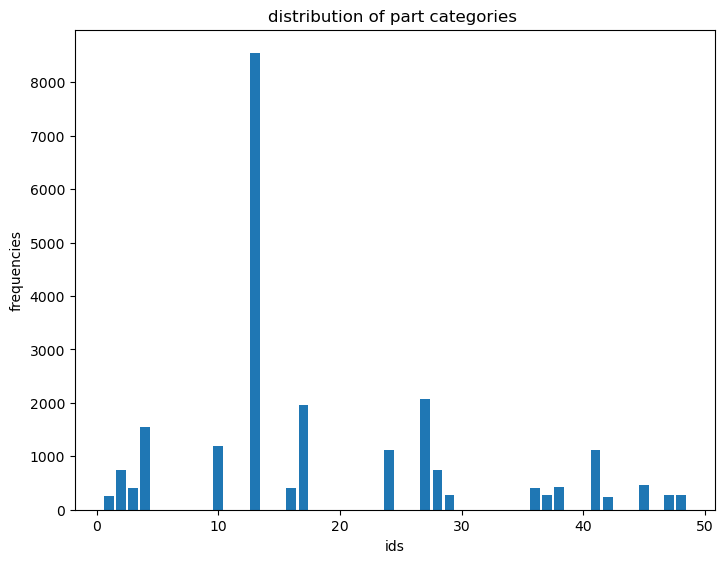

In [10]:
part_cat_ids = parts['part_cat_id']
part_cat_ids = list(part_cat_ids)
max_ = max(part_cat_ids)
min_ = min(part_cat_ids)
# counting frequencies of each id
counts = []
for i in range(min_, max_+1):
    counts.append(part_cat_ids.count(i))

# finding indexes of 20 largest part categories
max_indexes = sorted(range(len(counts)), key=lambda x: counts[x])
max_indexes = sorted(range(len(counts)), key=lambda x: counts[x])[-20:]

max_ids = [idx+1 for idx in max_indexes]
max_ids_counts = []
for index in max_indexes:
    max_ids_counts.append(counts[index])

print("20 most frequent ids: ", max_ids)
print("----------------------------------------------------------------------------------------------------------")
print("counts of 20 most frequent ids: ", max_ids_counts)

# plotting the distribution
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(max_ids, max_ids_counts)
ax.set_xlabel('ids')
ax.set_ylabel('frequencies')
ax.set_title("distribution of part categories ")
plt.show()

In [11]:
# Query 3
colors

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f
...,...,...,...,...
130,1004,Trans Flame Yellowish Orange,FCB76D,t
131,1005,Trans Fire Yellow,FBE890,t
132,1006,Trans Light Royal Blue,B4D4F7,t
133,1007,Reddish Lilac,8E5597,f


## Question 2. Drop the bike

*Los Angeles Metro* has been sharing publicly [anonymized *Metro Bike Share* trip data](https://bikeshare.metro.net/about/data/) under the [Open Database License (ODbL)](http://opendatacommons.org/licenses/odbl/1.0/).

In this question you will again perform data wrangling and interpretation.

### 2.1. Loading phase
Load the json file into a `DataFrame`.


In [12]:
BikeFile = DATA_FOLDER + "/bikes/metro-bike-share-trip-data.json"
CovidFile = DATA_FOLDER + "/covid/"
with open(BikeFile, 'r') as json_file:
    BikeData = json.load(json_file)

# converting to dataframe
BikeData_df = pd.DataFrame(BikeData)
BikeData_df

,Bike ID,Duration,End Time,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Passholder Type,Plan Duration,Start Time,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Trip ID,Trip Route Category
0,6281.0,180,2016-07-07T04:20:00,3014.0,34.056610,-118.237210,Monthly Pass,30.0,2016-07-07T04:17:00,3014.0,34.056610,-118.237210,1912818,Round Trip
1,6281.0,1980,2016-07-07T06:33:00,3014.0,34.056610,-118.237210,Monthly Pass,30.0,2016-07-07T06:00:00,3014.0,34.056610,-118.237210,1919661,Round Trip
2,5861.0,300,2016-07-07T10:37:00,3016.0,34.052898,-118.241560,Flex Pass,365.0,2016-07-07T10:32:00,3016.0,34.052898,-118.241560,1933383,Round Trip
3,5861.0,10860,2016-07-07T13:38:00,3016.0,34.052898,-118.241560,Flex Pass,365.0,2016-07-07T10:37:00,3016.0,34.052898,-118.241560,1944197,Round Trip
4,6674.0,420,2016-07-07T12:58:00,3032.0,34.049889,-118.255880,Walk-up,0.0,2016-07-07T12:51:00,3032.0,34.049889,-118.255880,1940317,Round Trip
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132422,5978.0,540,2017-03-31T23:52:00,3035.0,34.048401,-118.260948,Walk-up,0.0,2017-03-31T23:43:00,3055.0,34.044159,-118.251579,23660993,One Way
132423,6478.0,480,2017-03-31T23:52:00,3035.0,34.048401,-118.260948,Walk-up,0.0,2017-03-31T23:44:00,3055.0,34.044159,-118.251579,23660992,One Way
132424,6183.0,480,2017-03-31T23:52:00,3054.0,34.039219,-118.236488,Walk-up,0.0,2017-03-31T23:44:00,3082.0,34.046520,-118.237411,23660991,One Way
132425,5900.0,420,2017-03-31T23:52:00,3054.0,34.039219,-118.236488,Walk-up,0.0,2017-03-31T23:45:00,3082.0,34.046520,-118.237411,23660990,One Way


### 2.2. Cleaning phase
Describe the type and the value range of each attribute. Indicate and transform the attributes that are `Categorical`. Are there redundant columns in the dataset (i.e., are there columns whose value depends only on the value of another column)? What are the possible pitfalls of having such columns? Reduce *data redundancy* by extracting such columns to separate `DataFrames`. Which of the two formats (the initial one or the one with reduced data redundancy) is more susceptible to inconsistencies? At the end print for each `Dataframe` the *type of each column* and it's *shape*.

In [13]:
Bike_ID = BikeData_df['Bike ID']
Duration = BikeData_df['Duration']
End_Time = BikeData_df['End Time']
Ending_Station_ID = BikeData_df['Ending Station ID']
Ending_Station_Latitude = BikeData_df['Ending Station Latitude']
Passholder_Type = BikeData_df['Passholder Type']
Plan_Duration = BikeData_df['Plan Duration']
Start_Time = BikeData_df['Start Time']
Starting_Station_ID = BikeData_df['Starting Station ID']
Starting_Station_Latitude = BikeData_df['Starting Station Latitude']
Starting_Station_Longitude = BikeData_df['Starting Station Longitude']
Trip_ID = BikeData_df['Trip ID']
Trip_Route_Category = BikeData_df['Trip Route Category']

In [14]:
# describing the type and value range of attributes
print("Type of Bike ID: ", type(Bike_ID[0]), "- Range of Bike ID: ", min(list(Bike_ID)), " to ", max(list(Bike_ID)))
print("Type of Duration: ", type(Duration[0]), "- Range of Duration: ", min(list(Duration)), " to ", max(list(Duration)))
print("Type of End Time: ", type(End_Time[0]))
print("Type of Ending Station ID: ", type(Ending_Station_ID[0]), "- Range of Ending Station ID: ", min(list(Ending_Station_ID)), " to ", max(list(Ending_Station_ID)))
print("Type of Ending Station Latitude: ", type(Ending_Station_Latitude[0]), "- Range of Ending Station Latitude: ", min(list(Ending_Station_Latitude)), " to ", max(list(Ending_Station_Latitude)))
print("Type of Passholder Type: ", type(Passholder_Type[0]))
print("Type of Plan Duration: ", type(Plan_Duration[0]), "- Range of Plan Duration: ", min(list(Plan_Duration)), " to ", max(list(Plan_Duration)))
print("Type of Start Time: ", type(Start_Time[0]))
print("Type of Starting Station ID: ", type(Starting_Station_ID[0]), "- Range of Starting Station ID: ", min(list(Starting_Station_ID)), " to ", max(list(Starting_Station_ID)))
print("Type of Starting Station Latitude: ", type(Starting_Station_Latitude[0]), "- Range of Starting Station Latitude: ", min(list(Starting_Station_Latitude)), " to ", max(list(Starting_Station_Latitude)))
print("Type of Starting Station Longitude: ", type(Starting_Station_Longitude[0]), "- Range of starting Station Longitude: ", min((list(Starting_Station_Longitude))), " to ", max(list(Starting_Station_Longitude)))
print("Type of Trip ID: ", type(Trip_ID[0]), "- Range of Trip ID: ", min(list(Trip_ID)), " to ", max(list(Trip_ID)))
print("Type of Trip Route Category: ", type(Trip_Route_Category[0]))


Type of Bike ID:  <class 'numpy.float64'> - Range of Bike ID:  1349.0  to  6728.0
Type of Duration:  <class 'numpy.int64'> - Range of Duration:  60  to  86400
Type of End Time:  <class 'str'>
Type of Ending Station ID:  <class 'numpy.float64'> - Range of Ending Station ID:  3000.0  to  4108.0
Type of Ending Station Latitude:  <class 'numpy.float64'> - Range of Ending Station Latitude:  0.0  to  34.0642815
Type of Passholder Type:  <class 'str'>
Type of Plan Duration:  <class 'numpy.float64'> - Range of Plan Duration:  0.0  to  365.0
Type of Start Time:  <class 'str'>
Type of Starting Station ID:  <class 'numpy.float64'> - Range of Starting Station ID:  3000.0  to  4108.0
Type of Starting Station Latitude:  <class 'numpy.float64'> - Range of Starting Station Latitude:  0.0  to  34.0642815
Type of Starting Station Longitude:  <class 'numpy.float64'> - Range of starting Station Longitude:  -118.472832  to  0.0
Type of Trip ID:  <class 'numpy.int64'> - Range of Trip ID:  1912818  to  23794

**Categorical attributes:** From the above results, we can see that Passholder Type and Trip Route Category are categorical.

Transforming categorical attributes to numerical attributes:

In [15]:
# Passholder_Type
label_encoder1 = LabelEncoder()
Passholder_Type_Encoded = label_encoder1.fit_transform(Passholder_Type)
# Trip Route Category
label_encoder2 = LabelEncoder()
Trip_Route_Category_Encoded = label_encoder2.fit_transform(Trip_Route_Category)

#### Redundant columns:

**Start time:** as we have duration and end time, star time can be easily calculated, so this column is redundant.

**Trip Route Category**: If the latitudes and longtitudes of starting and ending destination are the same, then the trip is round-trip, otherwise it is one-way. So this column is redundant.

**Pass-holder type**: This column is redundant because it can be easily figured out using plan duration	entries. If plan duration is 30, then pass-holder type is monthly pass, if plan duration is 365, then pass-holder type is flex pass, if plan duration is 0, then pass-holder type is walk-up. So this column is redundant.

Having redundant columns makes our dataset huge, which is not convenient. Also, it increases potential of data inconsistencies.

Removing data redundancy:

In [16]:
# removing redundant columns from the data frame
BikeData_df_new = BikeData_df.drop(['Passholder Type', 'Start Time', 'Trip Route Category'], axis=1)
BikeData_df_new

,Bike ID,Duration,End Time,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Plan Duration,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Trip ID
0,6281.0,180,2016-07-07T04:20:00,3014.0,34.056610,-118.237210,30.0,3014.0,34.056610,-118.237210,1912818
1,6281.0,1980,2016-07-07T06:33:00,3014.0,34.056610,-118.237210,30.0,3014.0,34.056610,-118.237210,1919661
2,5861.0,300,2016-07-07T10:37:00,3016.0,34.052898,-118.241560,365.0,3016.0,34.052898,-118.241560,1933383
3,5861.0,10860,2016-07-07T13:38:00,3016.0,34.052898,-118.241560,365.0,3016.0,34.052898,-118.241560,1944197
4,6674.0,420,2016-07-07T12:58:00,3032.0,34.049889,-118.255880,0.0,3032.0,34.049889,-118.255880,1940317
...,...,...,...,...,...,...,...,...,...,...,...
132422,5978.0,540,2017-03-31T23:52:00,3035.0,34.048401,-118.260948,0.0,3055.0,34.044159,-118.251579,23660993
132423,6478.0,480,2017-03-31T23:52:00,3035.0,34.048401,-118.260948,0.0,3055.0,34.044159,-118.251579,23660992
132424,6183.0,480,2017-03-31T23:52:00,3054.0,34.039219,-118.236488,0.0,3082.0,34.046520,-118.237411,23660991
132425,5900.0,420,2017-03-31T23:52:00,3054.0,34.039219,-118.236488,0.0,3082.0,34.046520,-118.237411,23660990


This new `DataFrame` (shown above) is more susceptible to inconsistencies.

**Type of each column** and **shapes** of initial and modified `DataFrames`

In [17]:
# shape
print("Shape of the initial DataFrame: ", np.shape(BikeData_df))
print("Shape of the modified DataFrame: ", np.shape(BikeData_df_new))

Shape of the initial DataFrame:  (132427, 14)
Shape of the modified DataFrame:  (132427, 11)


In [18]:
# column types of initial DataFrame
print("Column types of the initial DataFrame:")
print("Bike ID: ", type(Bike_ID[0]))
print("Duration: ", type(Duration[0]))
print("End Time: ", type(End_Time[0]))
print("Ending Station ID: ", type(Ending_Station_ID[0]))
print("Ending Station Latitude: ", type(Ending_Station_Latitude[0]))
print("Passholder Type: ", type(Passholder_Type[0]))
print("Plan Duration: ", type(Plan_Duration[0]))
print("Start Time: ", type(Start_Time[0]))
print("Starting Station ID: ", type(Starting_Station_ID[0]))
print("Starting Station Latitude: ", type(Starting_Station_Latitude[0]))
print("Starting Station Longitude: ", type(Starting_Station_Longitude[0]))
print("Trip ID: ", type(Trip_ID[0]))
print("Trip Route Category: ", type(Trip_Route_Category[0]))

Column types of the initial DataFrame:
Bike ID:  <class 'numpy.float64'>
Duration:  <class 'numpy.int64'>
End Time:  <class 'str'>
Ending Station ID:  <class 'numpy.float64'>
Ending Station Latitude:  <class 'numpy.float64'>
Passholder Type:  <class 'str'>
Plan Duration:  <class 'numpy.float64'>
Start Time:  <class 'str'>
Starting Station ID:  <class 'numpy.float64'>
Starting Station Latitude:  <class 'numpy.float64'>
Starting Station Longitude:  <class 'numpy.float64'>
Trip ID:  <class 'numpy.int64'>
Trip Route Category:  <class 'str'>


In [19]:
# column types of modified DataFrame
print("Column types of the modified DataFrame:")
print("Bike ID: ", type(Bike_ID[0]))
print("Duration: ", type(Duration[0]))
print("End Time: ", type(End_Time[0]))
print("Ending Station ID: ", type(Ending_Station_ID[0]))
print("Ending Station Latitude: ", type(Ending_Station_Latitude[0]))
print("Plan Duration: ", type(Plan_Duration[0]))
print("Starting Station ID: ", type(Starting_Station_ID[0]))
print("Starting Station Latitude: ", type(Starting_Station_Latitude[0]))
print("Starting Station Longitude: ", type(Starting_Station_Longitude[0]))
print("Trip ID: ", type(Trip_ID[0]))

Column types of the modified DataFrame:
Bike ID:  <class 'numpy.float64'>
Duration:  <class 'numpy.int64'>
End Time:  <class 'str'>
Ending Station ID:  <class 'numpy.float64'>
Ending Station Latitude:  <class 'numpy.float64'>
Plan Duration:  <class 'numpy.float64'>
Starting Station ID:  <class 'numpy.float64'>
Starting Station Latitude:  <class 'numpy.float64'>
Starting Station Longitude:  <class 'numpy.float64'>
Trip ID:  <class 'numpy.int64'>


### 2.3. Querying phase
Answer the following queries using the functionality of `Pandas`.

1. * Plot the *distribution* of the number of outgoing trips from each station in a histogram with 20 bins (Hint: each bin describes a range of counts, not stations).
2. * Plot histograms for the *duration* and *trip starting hour in the day* attributes. For both the *duration*  and the *trip starting hour* use *discrete 1-hour intervals*. What do you observe in each plot? What are some popular values in the *duration* plot? Explain the local maxima and the trends you observe on the *trip starting hour* plot based on human behavior.
3. * For each *trip route category*, calculate the proportion of trips by *passholder type* and present your results in *a stacked bar chart with normalized height*.
4. * Considering only trips that begin in the morning hours (before noon), plot in *a single bar chart* the proportion of trips by *passholder type* and *trip route category*. Explain any outliers you observe.
5. * Separate the hours of the day into two intervals that have (approximately) the same number of bikes leaving the stations. For each of the two intervals calculate the proportion of trips by *passholder type* and 6. *trip route category*. Present your results in a `DataFrame` which has a unique, non-composite index. Does the proportion of trips depend on whether it is the first or second hour interval? Would the company have any significant benefit by creating a more complex paying scheme where monthly pass users would pay less in the first interval and (equally) more on the second one? Assume that the number of trips per interval will not change if the scheme changes.

**Query 1:**

For this part, I calculated frequency of each station ID, which is number of outgoing trips from each station using the `Starting_Station_ID` column. So I looped over items of this column, and counted how many times they were repeated.

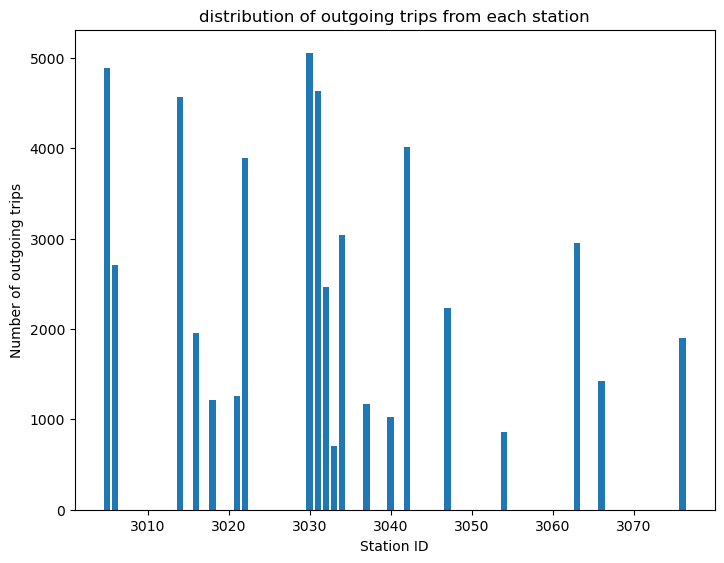

In [20]:
Starting_Station_ID_list = list(Starting_Station_ID)
# calculating number of frequencies for each station ID, which is number of outgoing trips for each station
vals = []
counts = []
for item in Starting_Station_ID:
    if item not in vals:
        vals.append(item)
        counts.append(Starting_Station_ID_list.count(item))
        
# plot histogram of the first 20 vals
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(vals[0:20], counts[0:20])
ax.set_xlabel('Station ID')
ax.set_ylabel('Number of outgoing trips')
ax.set_title("distribution of outgoing trips from each station")
plt.show()

**Query 2:**

For this part, at first I plot the histogram of *duration*.

Then for plotting histogram of trip starting hour in the day, I need to extract hour from the `Start time` column. I do this by splitting the corresponding strings.

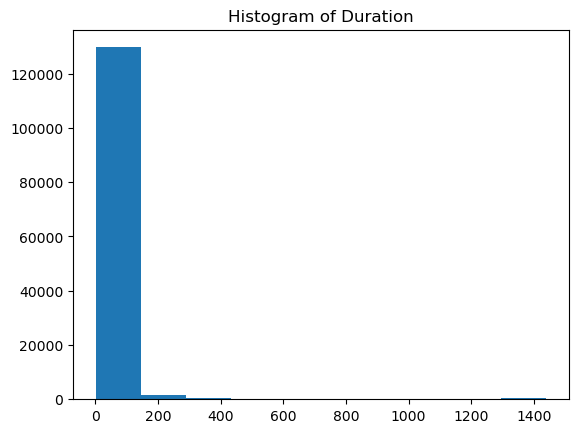

In [21]:
# converting duration scale to hour
Duration_h = [item/60 for item in Duration]
# histogram
plt.hist(Duration_h)
plt.title("Histogram of Duration")
plt.show()

From the above plot, we can see that popular duration is around 0 to 180 hours.

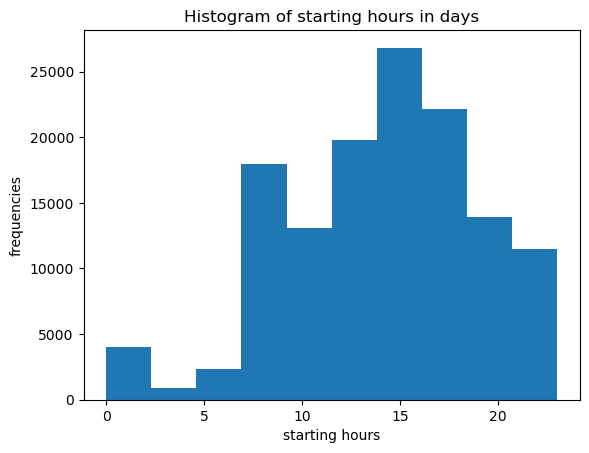

In [22]:
# extracting starting hour in days
times = [item.split("T")[1] for item in Start_Time]  # time
hours = [item.split(":")[0] for item in times]       # hour
hours_int = [int(item) for item in hours]            # hour string converted to int
# histogram
plt.hist(hours_int)
plt.title("Histogram of starting hours in days")
plt.xlabel("starting hours")
plt.ylabel("frequencies")
plt.show()

From the above plot, we can see that starting hour has a peak around 3 p.m.

**Query 3**

In this part, I loop over all Trip_Route_Category items and calculate portion of Passholder_Type for each route category.

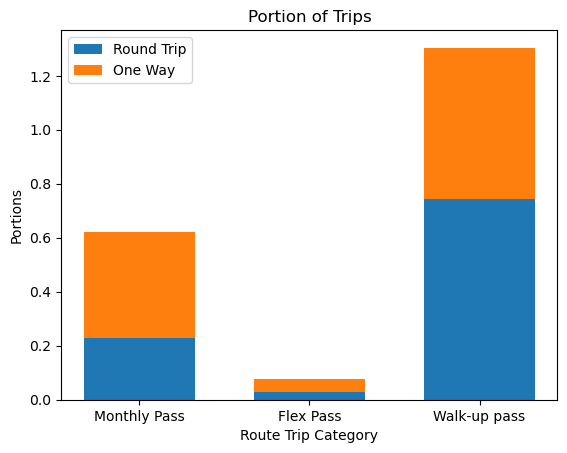

In [23]:
Trip_Route_Category = BikeData_df['Trip Route Category']
Passholder_Type = BikeData_df['Passholder Type']

round_monthly = 0
round_flex = 0
round_walk = 0

one_monthly = 0
one_flex = 0
one_walk = 0

for i in range(len(Trip_Route_Category)):
    if Trip_Route_Category[i] == "Round Trip":
        if Passholder_Type[i] == "Monthly Pass":
            round_monthly = round_monthly + 1
        if Passholder_Type[i] == "Flex Pass":
            round_flex = round_flex +  1
        else:
            round_walk = round_walk + 1
    if Trip_Route_Category[i] == "One Way":
        if Passholder_Type[i] == "Monthly Pass":
            one_monthly = one_monthly + 1
        if Passholder_Type[i] == "Flex Pass":
            one_flex = one_flex + 1
        else:
            one_walk = one_walk + 1   
            
# calculating portions
round_monthly_portion = round_monthly/(round_monthly+round_flex+round_walk) 
round_flex_portion = round_flex/(round_monthly+round_flex+round_walk)
round_walk_portion = round_walk/(round_monthly+round_flex+round_walk)

one_monthly_portion = one_monthly/(one_monthly+one_flex+one_walk)
one_flex_portion = one_flex/(one_monthly+one_flex+one_walk)
one_walk_portion = one_walk/(one_monthly+one_flex+one_walk)

width = 0.65

# plotting the chart bar
fig, ax = plt.subplots()
ax.bar(['Monthly Pass', 'Flex Pass', 'Walk-up pass'], [round_monthly_portion, round_flex_portion, round_walk_portion], width, label='Round Trip')
ax.bar(['Monthly Pass', 'Flex Pass', 'Walk-up pass'], [one_monthly_portion, one_flex_portion, one_walk_portion], width, bottom=[round_monthly_portion, round_flex_portion, round_walk_portion], label='One Way')
ax.set_xlabel("Route Trip Category")
ax.set_ylabel("Portions")
ax.set_title("Portion of Trips")
ax.legend()
plt.show()

**Query 4**

I use the extracted starting hours of days from the previous parts.

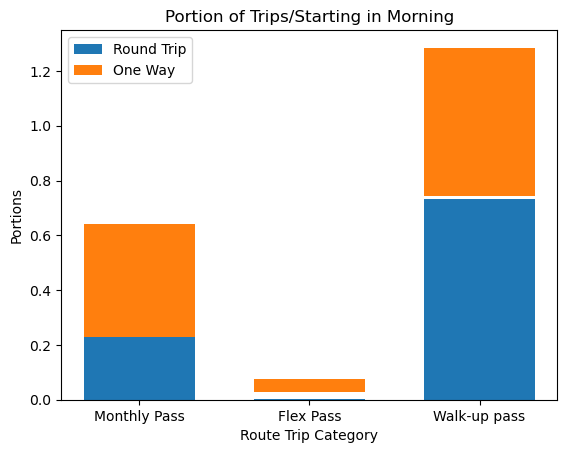

In [24]:
# extracting indexes of trips with starting hours in the morning
morning_indexes = []
for i in range(len(hours_int)):
    if hours_int[i]<12:
        morning_indexes.append(i)

Trip_Route_Category = list(BikeData_df['Trip Route Category'])
Passholder_Type = list(BikeData_df['Passholder Type'])

Trip_Route_Category_morning = [Trip_Route_Category[index] for index in morning_indexes]
Passholder_Type_morning = [Passholder_Type[index] for index in morning_indexes]

round_monthly_morning = 0
round_flex_morning = 0
round_walk_morning = 0

one_monthly_morning = 0
one_flex_morning = 0
one_walk_morning = 0

for i in range(len(Trip_Route_Category_morning)):
    if Trip_Route_Category_morning[i] == "Round Trip":
        if Passholder_Type_morning[i] == "Monthly Pass":
            round_monthly_morning = round_monthly_morning + 1
        if Passholder_Type_morning[i] == "Flex Pass":
            round_flex_morning = round_flex_morning +  1
        else:
            round_walk_morning = round_walk_morning + 1
    if Trip_Route_Category_morning[i] == "One Way":
        if Passholder_Type_morning[i] == "Monthly Pass":
            one_monthly_morning = one_monthly_morning + 1
        if Passholder_Type_morning[i] == "Flex Pass":
            one_flex_morning = one_flex_morning + 1
        else:
            one_walk_morning = one_walk_morning + 1   
            
# calculating portions
round_monthly_morning_portion = round_monthly_morning/(round_monthly_morning+round_flex_morning+round_walk_morning) 
round_flex_morning_portion = round_flex_morning/(one_monthly_morning+one_flex_morning+round_walk_morning)
round_walk_morning_portion = round_walk_morning/(round_monthly_morning+round_flex_morning+round_walk_morning)

one_monthly_morning_portion = one_monthly_morning/(one_monthly_morning+one_flex_morning+one_walk_morning)
one_flex_morning_portion = one_flex_morning/(one_monthly_morning+one_flex_morning+one_walk_morning)
one_walk_morning_portion = one_walk_morning/(one_monthly_morning+one_flex_morning+one_walk_morning)

width = 0.65

# plotting the chart bar
fig, ax = plt.subplots()
ax.bar(['Monthly Pass', 'Flex Pass', 'Walk-up pass'], [round_monthly_morning_portion, round_flex_morning_portion, round_walk_morning_portion], width, label='Round Trip')
ax.bar(['Monthly Pass', 'Flex Pass', 'Walk-up pass'], [one_monthly_morning_portion, one_flex_morning_portion, one_walk_morning_portion], width, bottom=[round_monthly_portion, round_flex_portion, round_walk_portion], label='One Way')
ax.set_xlabel("Route Trip Category")
ax.set_ylabel("Portions")
ax.set_title("Portion of Trips/Starting in Morning")
ax.legend()
plt.show()


## Question 3. Class War in Titanic

Use pandas to import the data file `Data/titanic.xls`. It contains data on all the passengers that travelled on the Titanic.

[Run the following cell for a brief description about the dataset]

In [25]:
from IPython.core.display import HTML
HTML(filename=DATA_FOLDER+'/titanic.html')

Name,Labels,Units,Levels,Storage,NAs
pclass,,,3,integer,0
survived,Survived,,,double,0
name,Name,,,character,0
sex,,,2,integer,0
age,Age,Year,,double,263
sibsp,Number of Siblings/Spouses Aboard,,,double,0
parch,Number of Parents/Children Aboard,,,double,0
ticket,Ticket Number,,,character,0
fare,Passenger Fare,British Pound (\243),,double,1
cabin,,,187,integer,0


In [26]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [27]:
# importing the dataset
titanic_df = pd.read_excel(r'data/titanic.xls')
titanic_df.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [28]:
titanic_df.tail(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S,NaN,NaN,NaN


For each of the following questions state clearly your assumptions and discuss your findings:
1. Describe the *type* and the *value range* of each attribute. Indicate and transform the attributes that can be `Categorical`. 
2. Plot histograms for the *travel class*, *embarkation port*, *sex* and *age* attributes. For the latter one, use *discrete decade intervals*. 
3. Calculate the proportion of passengers by *cabin floor*. Present your results in a *pie chart*.
4. For each *travel class*, calculate the proportion of the passengers that survived. Present your results in *pie charts*.
5. Calculate the proportion of the passengers that survived by *travel class* and *sex*. Present your results in *a single histogram*.
6. Create 2 equally populated *age categories* and calculate survival proportions by *age category*, *travel class* and *sex*. Present your results in a `DataFrame` with unique index.

**Query 1**

In [29]:
# describing the type of each attribute
titanic_df.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [30]:
# describing the value range of each attribute
titanic_df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


From the min and max rows for each attribute, the range is obvious.

**Query 2**

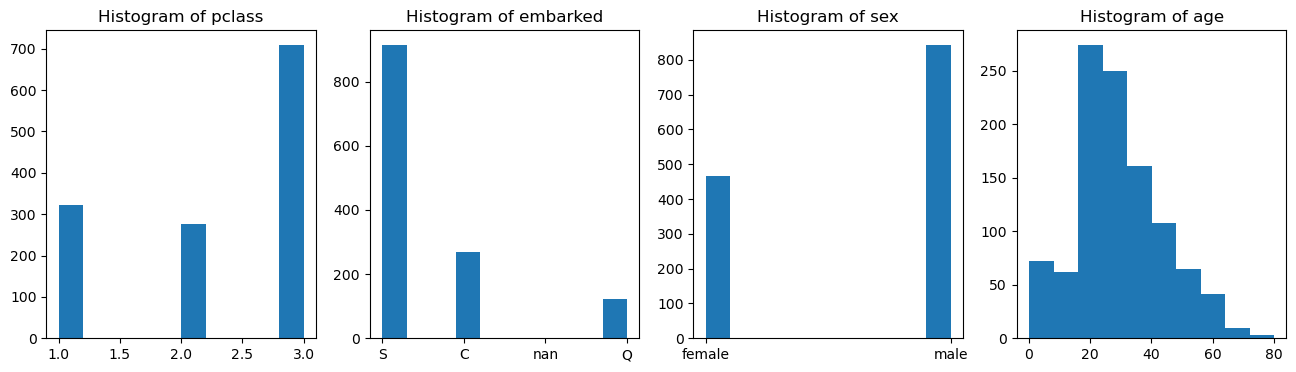

In [31]:
# plotting histograms
pclass = titanic_df['pclass']
embarked = list(titanic_df['embarked'])
sex = titanic_df['sex']
age = titanic_df['age']

fig, ax = plt.subplots(1, 4, figsize=(16, 4))
ax[0].hist(pclass)
ax[0].set_title("Histogram of pclass")
ax[1].hist(embarked)
ax[1].set_title("Histogram of embarked")
ax[2].hist(sex)
ax[2].set_title("Histogram of sex")
ax[3].hist(age)
ax[3].set_title("Histogram of age")
plt.show()

**Query 3**

For this part, I extracted all cabin floor names and counted passengers for each cabin floor. I removed NaNs from the list of cabin floors.

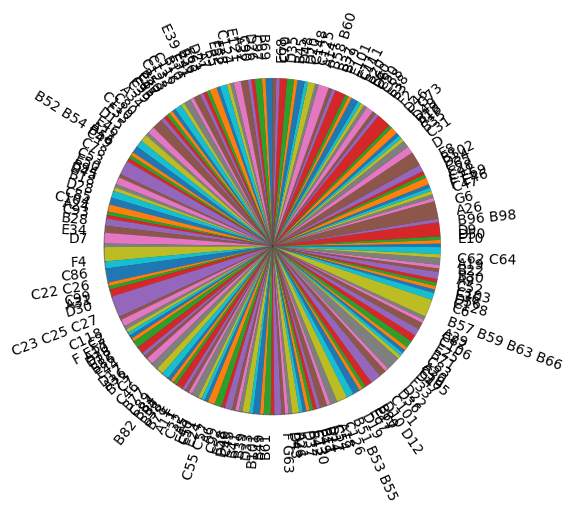

In [32]:
cabin = list(titanic_df['cabin'])
# removing nan from the cabin list
cabin_new = [item for item in cabin if str(item)!='nan']
cabin_unique = list(set(cabin_new))  # unique names of cabin floors
cabin_counts = [cabin_new.count(item) for item in cabin_unique]
cabin_portions = [item/len(cabin_new) for item in cabin_counts]

fig1, ax1 = plt.subplots()
ax1.pie(cabin_portions, labels=cabin_unique, 
        shadow=True, startangle=90, normalize=True, radius=10, rotatelabels=True)
ax1.axis('equal')
plt.show()

**Query 4**

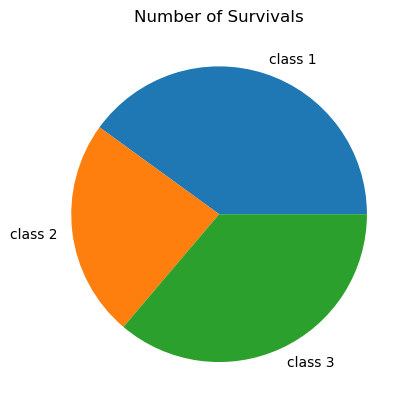

In [33]:
pclass = titanic_df['pclass']
survived = titanic_df['survived']
# crearing counters
survived_1 = 0
survived_2 = 0
survived_3 = 0

for i in range(len(pclass)):
    if pclass[i]==1:
        survived_1 = survived_1 + survived[i]
    if pclass[i]==2:
        survived_2 = survived_2 + survived[i]
    if pclass[i]==3:
        survived_3 = survived_3 + survived[i]
        
# calculating the proportions
survived_1_portion = survived_1/(survived_1+survived_2+survived_3)
survived_2_portion = survived_2/(survived_1+survived_2+survived_3)
survived_3_portion = survived_3/(survived_1+survived_2+survived_3)

plt.pie([survived_1_portion, survived_2_portion, survived_3_portion], labels = ['class 1', 'class 2', 'class 3'])
plt.title("Number of Survivals")
plt.show()

**Query 5**

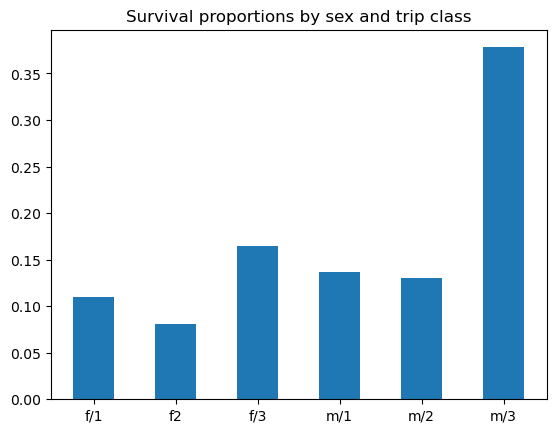

In [34]:
pclass = titanic_df['pclass']
sex = titanic_df['sex']
survived = titanic_df['survived']

female_1 = 0
female_2 = 0
female_3 = 0

male_1 = 0
male_2 = 0
male_3 = 3

for i in range(len(survived)):
    if pclass[i]==1 and sex[i]=='female':
        female_1 = female_1 + 1
    if pclass[i]==1 and sex[i]=='male':
        male_1 = male_1 + 1
    if pclass[i]==2 and sex[i]=='female':
        female_2 = female_2 + 1
    if pclass[i]==2 and sex[i]=='male':
        male_2 = male_2 + 1
    if pclass[i]==3 and sex[i]=='female':
        female_3 = female_3 + 1
    if pclass[i]==3 and sex[i]=='male':
        male_3 = male_3 + 1
        
#calculating the porportions
female_1_por = female_1/(female_1+female_2+female_3+male_1+male_2+male_3)
female_2_por = female_2/(female_1+female_2+female_3+male_1+male_2+male_3)
female_3_por = female_3/(female_1+female_2+female_3+male_1+male_2+male_3)
male_1_por = male_1/(female_1+female_2+female_3+male_1+male_2+male_3)
male_2_por = male_2/(female_1+female_2+female_3+male_1+male_2+male_3)
male_3_por = male_3/(female_1+female_2+female_3+male_1+male_2+male_3)

# plotting the chart bar
fig, ax = plt.subplots()
ax.bar(['f/1', 'f2', 'f/3', 'm/1', 'm/2', 'm/3'], [female_1_por, female_2_por, female_3_por, male_1_por, male_2_por, male_3_por], width=0.5)
plt.title("Survival proportions by sex and trip class")
plt.show()


In the above plot, f/1 stands for female in the first class; f/2 stands for female in the second class, f/3 stands for female in the third class, m/1 stands for male in the first class, m/2 stands for male in the second class and m/3 stands for male in the third class.

## Question 4. Covid in the US
In this question, you are required to reproduce the graphs shown in a real journalistic article. After all, reproducibility is an important part of professional journalism as well as data science. Also, a great deal of a data scientist's work is to communicate data in a way that anyone with any level of expertise in the field would understand.

You should reproduce the 4 graphs shown in <a href="https://projects.fivethirtyeight.com/coronavirus-polls/"> this article</a>. The data is openly accessible through <a href="https://github.com/fivethirtyeight/covid-19-polls/"> FiveThirtyEight's github</a>. Nevertheless, both the data and the article are available in `data` folder in case of unstable internet connections!

* Note: Your graphs don't have to be as interactive or detailed as the ones on the website. Only showing the averages, some (not all) data points with light color, legends, titles, x values, and y values are necessary.

In [35]:
# Write your answer here

__\* Briefly explain your approach and assumptions here \*__